In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv("LoanApprovalPrediction.csv") 
data1 = pd.read_csv("LoanApprovalPrediction.csv") 

In [2]:
data1['Loan_Status'] = data1['Loan_Status'].replace('Y',"approved")
data1['Loan_Status'] = data1['Loan_Status'].replace('N',"rejected")
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,approved
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,rejected
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,approved
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,approved
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,approved


In [3]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
data.shape

(598, 12)

In [5]:
# Checking for null/missing values
data.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:

data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#descriptive statistics
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [8]:
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 7


Text(0.5, 1.0, 'Number of Dependents')

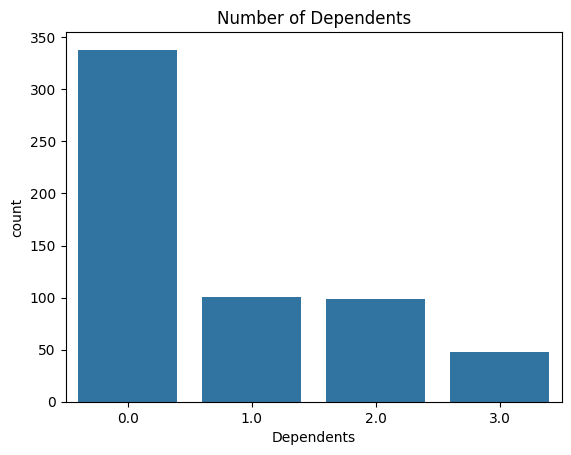

In [9]:
#number of dependents 

sns.countplot(x = 'Dependents', data = data).set_title('Number of Dependents')

Text(0.5, 1.0, 'Education v/s Coapplication Income')

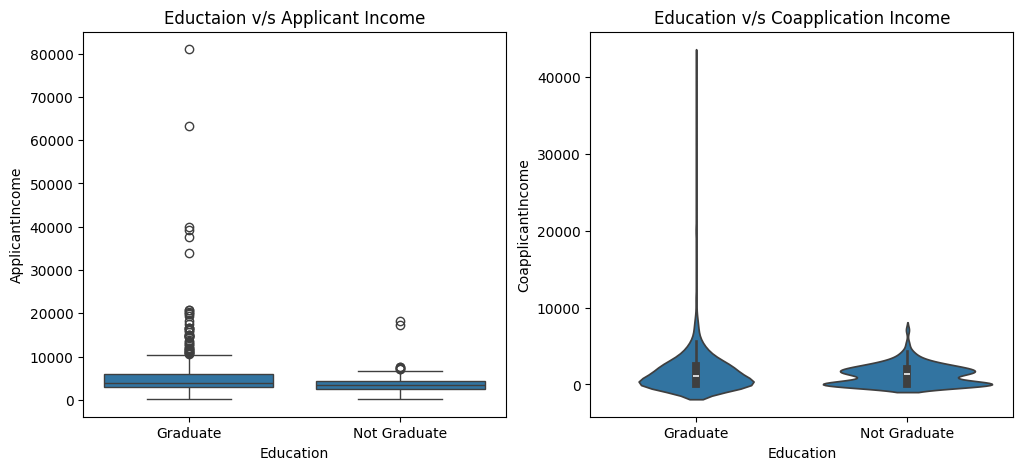

In [10]:
#education and income

fig, ax = plt.subplots(1,2,figsize=(12, 5))
sns.boxplot(x = 'Education', y = 'ApplicantIncome', data = data, ax=ax[0]).set_title('Eductaion v/s Applicant Income')
sns.violinplot(x = 'Education', y = 'CoapplicantIncome', data = data, ax=ax[1])
plt.title('Education v/s Coapplication Income')

Text(0.5, 1.0, 'Education by Self Employed')

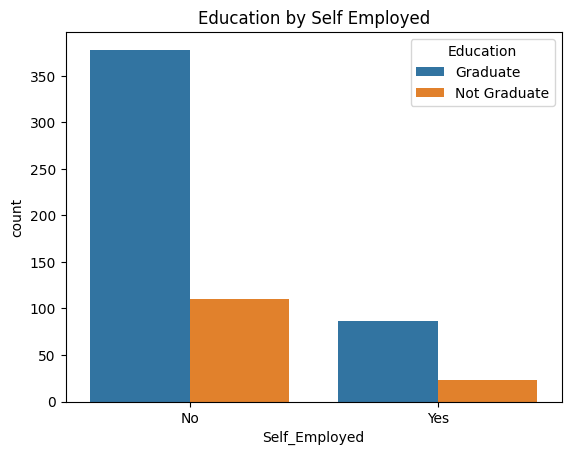

In [11]:
#employment status and education

sns.countplot(x='Self_Employed', data = data, hue = 'Education').set_title('Education by Self Employed')

Text(0.5, 1.0, 'Loan Amount v/s Loan Term')

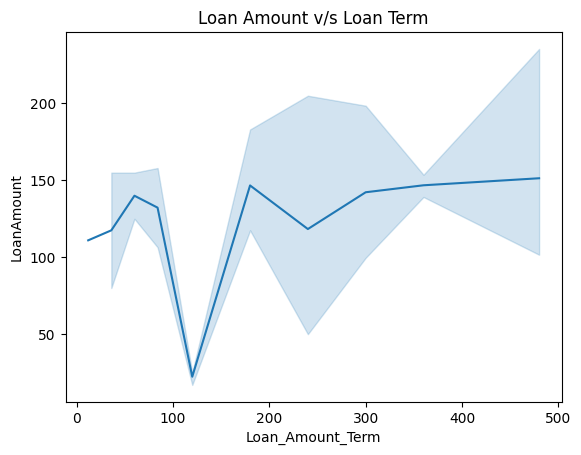

In [12]:
#loan amount and tenure

sns.lineplot(x = 'Loan_Amount_Term', y = 'LoanAmount', data = data).set_title('Loan Amount v/s Loan Term')

In [13]:
#property area and loan status

# Filter data for Urban, Rural, and Semiurban
urban_data = data[data["Property_Area"] =='Urban']
rural_data = data[data['Property_Area'] == 'Rural']
semiurban_data = data[data['Property_Area'] == 'Semiurban']

print(urban_data)

      Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0    LP001002    Male      No         0.0      Graduate            No   
2    LP001005    Male     Yes         0.0      Graduate           Yes   
3    LP001006    Male     Yes         0.0  Not Graduate            No   
4    LP001008    Male      No         0.0      Graduate            No   
5    LP001011    Male     Yes         2.0      Graduate           Yes   
..        ...     ...     ...         ...           ...           ...   
584  LP002949  Female      No         3.0      Graduate           Yes   
586  LP002953    Male     Yes         3.0      Graduate            No   
589  LP002960    Male     Yes         0.0  Not Graduate            No   
595  LP002983    Male     Yes         1.0      Graduate            No   
596  LP002984    Male     Yes         2.0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         Na

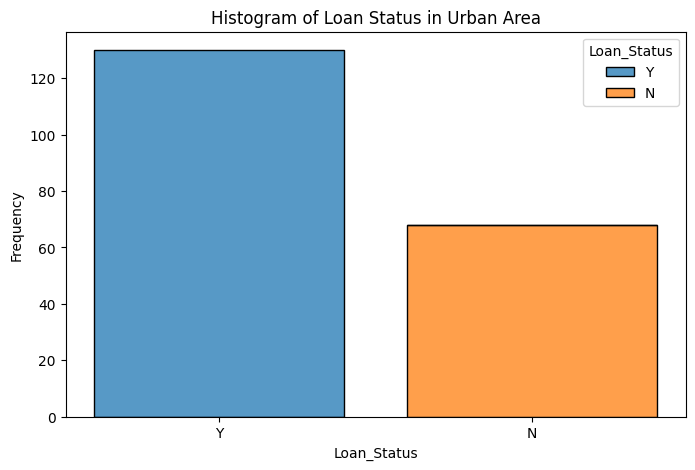

In [14]:
# Plotting histogram for Urban
plt.figure(figsize=(8, 5))
sns.histplot(data=urban_data, x='Loan_Status', hue='Loan_Status', multiple='stack', shrink=0.8)
plt.title('Histogram of Loan Status in Urban Area')
plt.xlabel('Loan_Status')
plt.ylabel('Frequency')
plt.show()

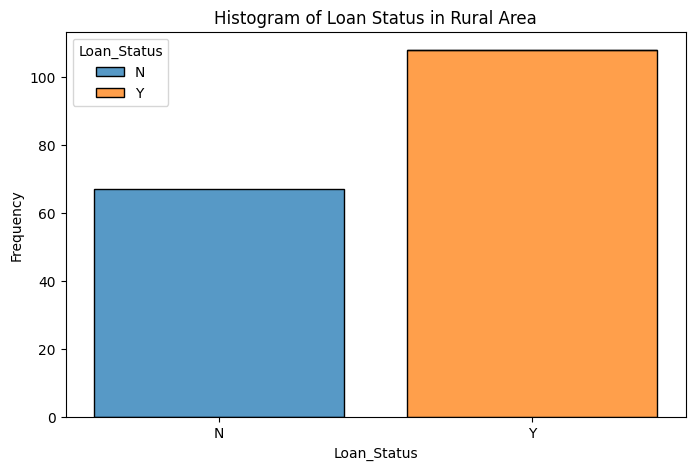

In [15]:
# Plotting histogram for Rural
plt.figure(figsize=(8, 5))
sns.histplot(data=rural_data, x='Loan_Status', hue='Loan_Status', multiple='stack', shrink=0.8)
plt.title('Histogram of Loan Status in Rural Area')
plt.xlabel('Loan_Status')
plt.ylabel('Frequency')
plt.show()

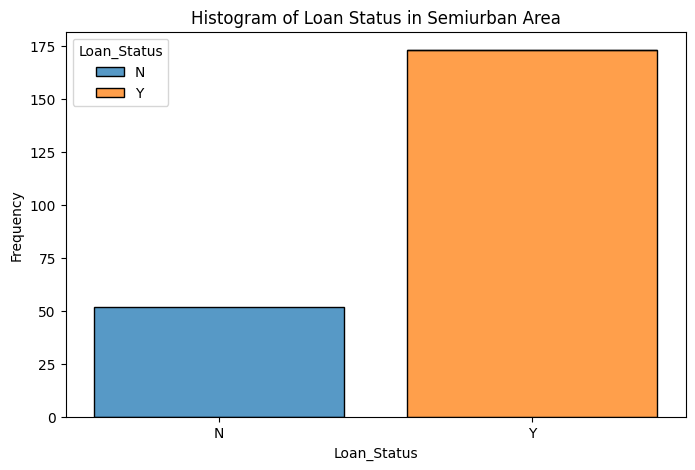

In [16]:
# Plotting histogram for Semiurban
plt.figure(figsize=(8, 5))
sns.histplot(data=semiurban_data, x='Loan_Status', hue='Loan_Status', multiple='stack', shrink=0.8)
plt.title('Histogram of Loan Status in Semiurban Area')
plt.xlabel('Loan_Status')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Number of Dependents v/s Loan Status')

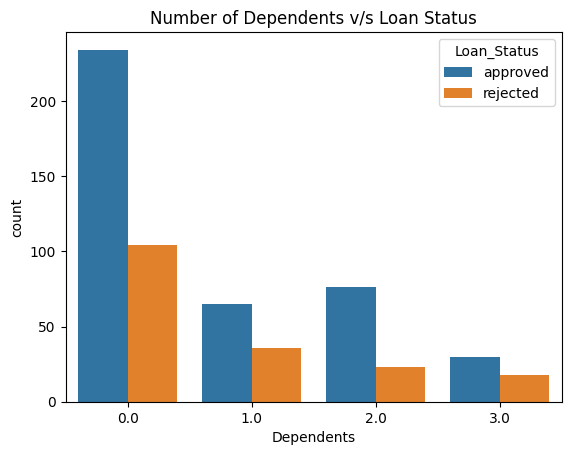

In [17]:
#number of dependents vs loan status

sns.countplot(x = 'Dependents', data = data1, hue = 'Loan_Status').set_title('Number of Dependents v/s Loan Status')

Text(0.5, 1.0, 'Loan Status by Education')

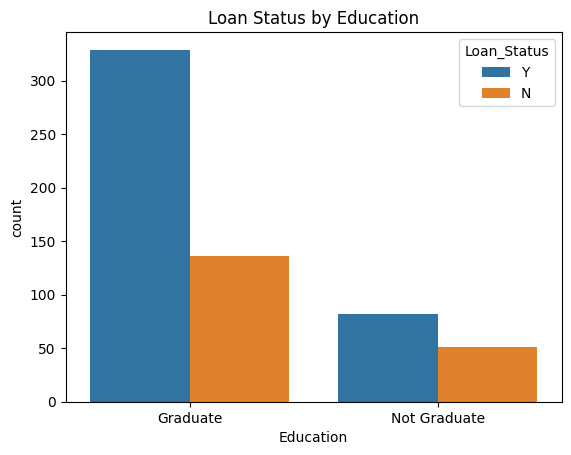

In [18]:
#education vs loan status

sns.countplot(x = 'Education', hue = 'Loan_Status', data = data).set_title('Loan Status by Education')

Text(0.5, 1.0, 'Loan Status by Credit History')

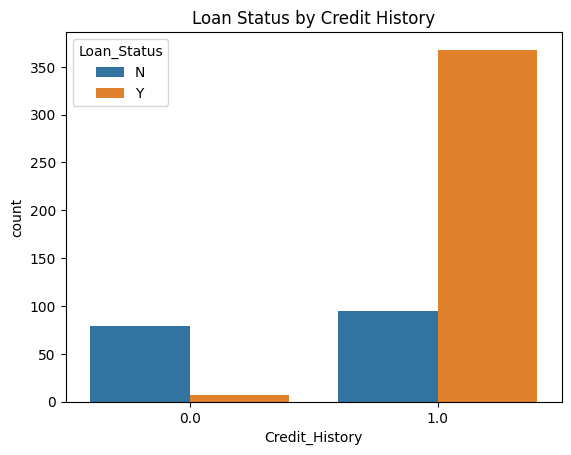

In [19]:
#credit history vs loan status

sns.countplot(x='Credit_History', data = data, hue = 'Loan_Status').set_title('Loan Status by Credit History')  

Text(0.5, 1.0, 'Loan Amount & tenure v/s Loan Status')

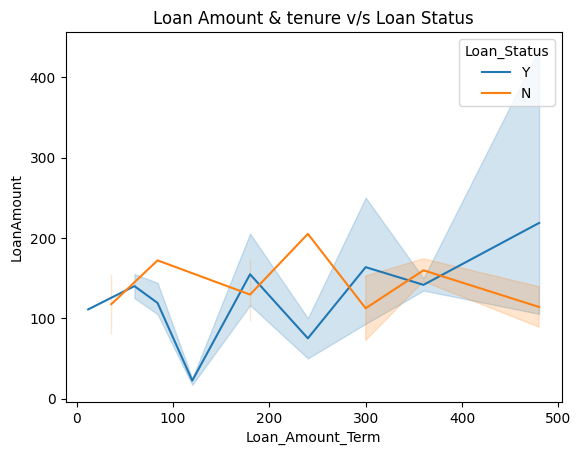

In [21]:
#Loan amount & tenure Vs Loan Status

sns.lineplot(x='Loan_Amount_Term', y='LoanAmount', data=data, hue='Loan_Status').set_title('Loan Amount & tenure v/s Loan Status')

In [22]:
# Dropping Loan_ID column 
data.drop(['Loan_ID'],axis=1,inplace=True)

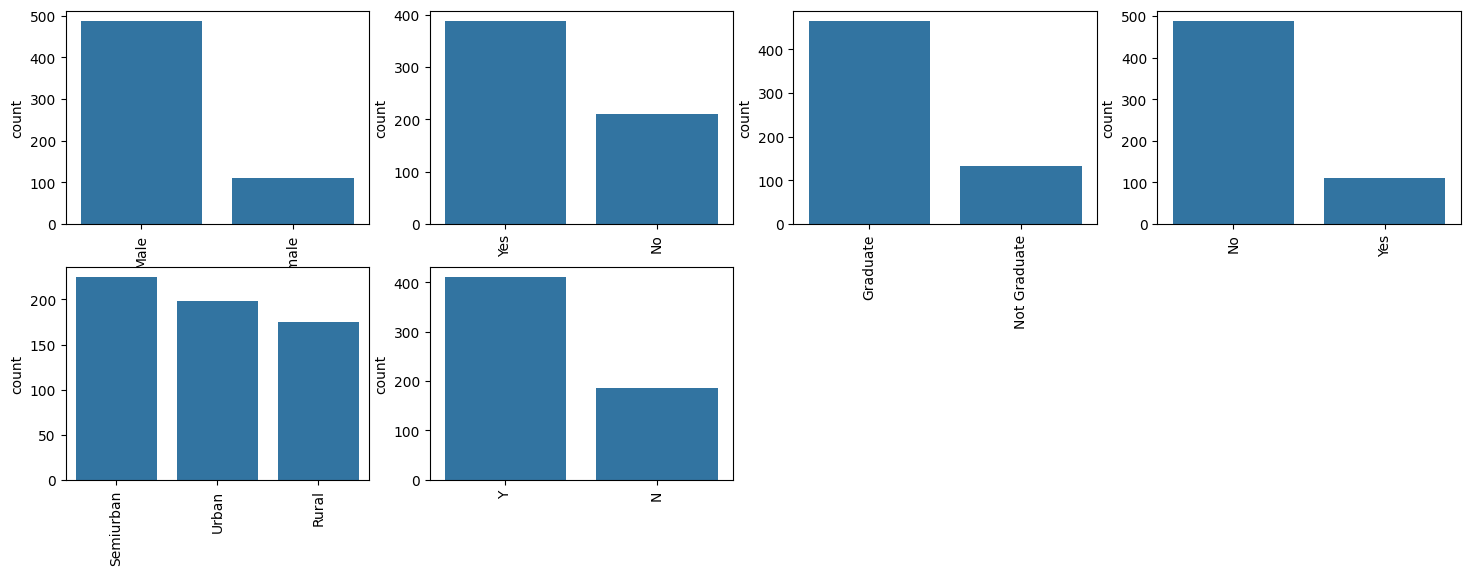

In [23]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
    y = data[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y) 
    index +=1

In [24]:
# Import label encoder 
from sklearn import preprocessing 
	
# label_encoder object knows how 
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
    data[col] = label_encoder.fit_transform(data[col])

In [25]:
# To find the number of columns with 
# datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

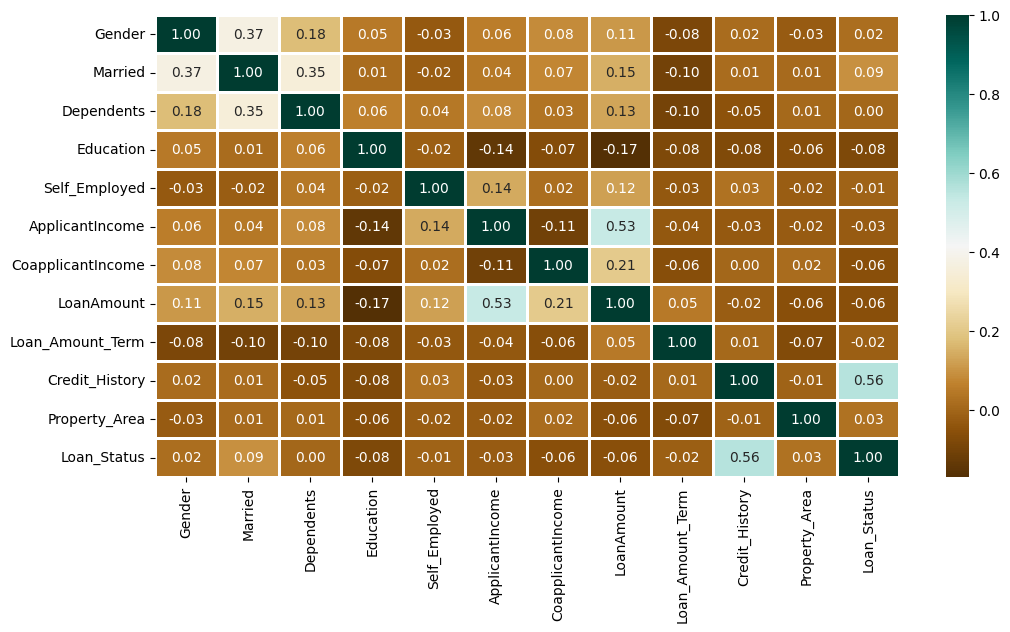

In [26]:
plt.figure(figsize=(12,6)) 
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

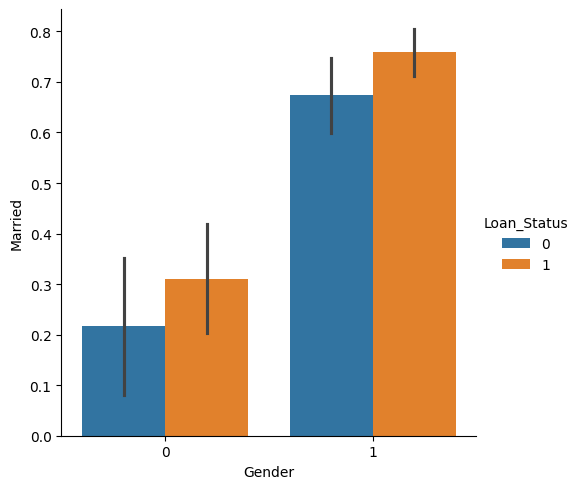

In [27]:
sns.catplot(x="Gender", y="Married", hue="Loan_Status", kind="bar", data=data)

In [28]:
for col in data.columns: 
    data[col] = data[col].fillna(data[col].mean()) 
	
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split 

X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 
X.shape,Y.shape 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.4,random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [30]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 

from sklearn import metrics 

knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =7) 
svc = SVC() 
lc = LogisticRegression() 

# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
	clf.fit(X_train, Y_train) 
	Y_pred = clf.predict(X_train) 
	print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(Y_train, Y_pred))

Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 79.60893854748603


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [32]:
# Trainign the model using the training data
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [33]:
# Training Accuracy
dtree.score(X_train, Y_train)

1.0

In [34]:
# Predicting the Loan Approval Status
dtree_pred = dtree.predict(X_train)

In [35]:
print("Accuracy of Decision Tree is:",100*metrics.accuracy_score(Y_train, dtree_pred))

Accuracy of Decision Tree is: 100.0


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =7) 

rfc.fit(X_train, Y_train) 
rfc_pred = rfc.predict(X_train) 
print("Accuracy score of ", rfc.__class__.__name__,"=",100*metrics.accuracy_score(Y_train, rfc_pred))

Accuracy score of  RandomForestClassifier = 98.04469273743017


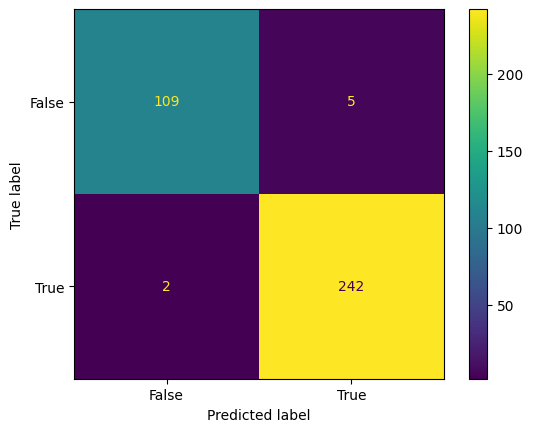

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_train, rfc_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

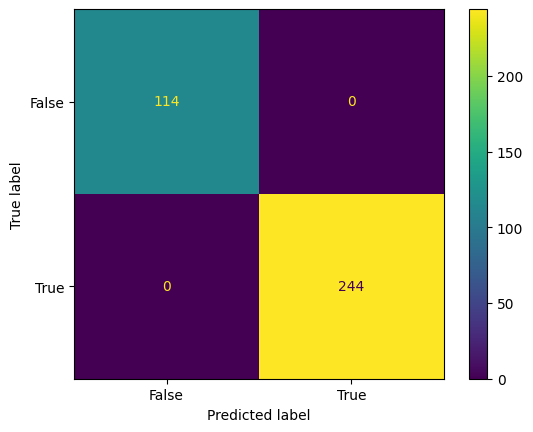

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = metrics.confusion_matrix(Y_train, dtree_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       114
           1       0.98      0.99      0.99       244

    accuracy                           0.98       358
   macro avg       0.98      0.97      0.98       358
weighted avg       0.98      0.98      0.98       358



In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, dtree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       244

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358

